## 01. Import Libraries

In [74]:
# import libraries

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt


## 02. Import Data

In [99]:
# importing our cleaned data set from the last notebook:

df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/merged_temp_ride_data.csv', index_col = 0 )

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_3017/556296996.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/merged_temp_ride_data.csv', index_col = 0 )


In [101]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
average_temp          float64
dtype: object

In [103]:
# set date to datetime format:

df['date'] = pd.to_datetime(df['date'])
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
average_temp                 float64
dtype: object

In [105]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp
0,F2E235CF6C94C4AE,classic_bike,2022-11-05 17:56:05.905,2022-11-05 18:09:57.700,5 Ave & E 29 St,6248.06,W 35 St & 9 Ave,6569.09,40.745168,-73.986831,40.754145,-73.996089,member,2022-11-05,19.4
1,52D4E9186C185927,classic_bike,2022-10-25 18:21:18.372,2022-10-25 18:38:15.674,45 St & 4 Ave,3275.03,17 St & 5 Ave,3699.07,40.649145,-74.009486,40.663493,-73.991007,member,2022-10-25,16.9
2,0A3A3A00DEB36556,electric_bike,2022-10-10 18:12:58.401,2022-10-10 18:19:03.820,South St & Pike St,5159.07,Cliff St & Fulton St,5065.14,40.709947,-73.991542,40.708380,-74.004950,member,2022-10-10,15.8
3,59D536E3C44FF806,classic_bike,2022-07-19 08:30:56.306,2022-07-19 08:52:40.254,E 1 St & 1 Ave,5593.01,1 Ave & E 62 St,6753.08,40.723356,-73.988650,40.761227,-73.960940,member,2022-07-19,28.2
4,C441A6C657E7E420,electric_bike,2022-10-19 21:38:45.089,2022-10-19 21:56:47.120,W 35 St & 9 Ave,6569.09,Washington St & Barrow St,5847.08,40.754145,-73.996089,40.731911,-74.008769,casual,2022-10-19,10.0


In [107]:
# this isn't chronological, lets fix that before continuing forward and setting date as index!

df = df.sort_values(by='date')

In [108]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp
2384530,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6
2850779,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6
1044329,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6
419689,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6
2094689,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6


In [18]:
# let's also export this for future use!

df.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/merged_data_chronological.csv')

In [89]:
# now we can set our date as an index in a new DF and see how temp varies throughout the year!

## 03. Data Consistency Check

In [111]:
# I want to make sure all ride times are within reason (less than 24 hours, but greater than 0 minutes before getting too deep into any visualizations!

In [113]:
# make a box plot of one of the categorical variables:
# i think it would be useful to check out the trip length, but first, we will need to make a new column and do some math
# lets make sure that the starting and ending time columns are in date-time format:

print(df['started_at'].head())
print(df['ended_at'].head())

2384530    2022-01-01 09:55:25.013
2850779    2022-01-01 15:10:00.630
1044329    2022-01-01 02:35:34.345
419689     2022-01-01 15:29:24.789
2094689    2022-01-01 08:38:24.623
Name: started_at, dtype: object
2384530    2022-01-01 10:05:47.093
2850779    2022-01-01 15:18:29.885
1044329    2022-01-01 02:58:21.676
419689     2022-01-01 15:40:11.693
2094689    2022-01-01 08:48:09.812
Name: ended_at, dtype: object


In [115]:
df1 = df

df1['started_at'] = df1['started_at'].str.strip()
df1['ended_at'] = df1['ended_at'].str.strip()

print(df1['started_at'].head())
print(df1['ended_at'].head())

2384530    2022-01-01 09:55:25.013
2850779    2022-01-01 15:10:00.630
1044329    2022-01-01 02:35:34.345
419689     2022-01-01 15:29:24.789
2094689    2022-01-01 08:38:24.623
Name: started_at, dtype: object
2384530    2022-01-01 10:05:47.093
2850779    2022-01-01 15:18:29.885
1044329    2022-01-01 02:58:21.676
419689     2022-01-01 15:40:11.693
2094689    2022-01-01 08:48:09.812
Name: ended_at, dtype: object


In [117]:
# convert to datetime with milliseconds...

df1['started_at'] = pd.to_datetime(df1['started_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df1['ended_at'] = pd.to_datetime(df1['ended_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

print(df1['started_at'].head())
print(df1['ended_at'].head())

2384530   2022-01-01 09:55:25.013
2850779   2022-01-01 15:10:00.630
1044329   2022-01-01 02:35:34.345
419689    2022-01-01 15:29:24.789
2094689   2022-01-01 08:38:24.623
Name: started_at, dtype: datetime64[ns]
2384530   2022-01-01 10:05:47.093
2850779   2022-01-01 15:18:29.885
1044329   2022-01-01 02:58:21.676
419689    2022-01-01 15:40:11.693
2094689   2022-01-01 08:48:09.812
Name: ended_at, dtype: datetime64[ns]


In [122]:
# now that we have the correct format, we shoudl be able to populate our new dataframe with ride time!

df1['trip_length_minutes'] = (df1['ended_at'] - df1['started_at']).dt.total_seconds() / 60

df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes
2384530,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000
2850779,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583
1044329,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850
419689,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733
2094689,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456896,B0C57EA724B535EE,classic_bike,2022-12-31 11:03:00.039,2022-12-31 11:23:47.697,Dock St & Front St,4903.09,Union St & 4 Ave,4175.15,40.702709,-73.992530,40.677274,-73.982820,member,2022-12-31,8.2,20.794300
807241,BB5230400FC38074,electric_bike,2022-12-31 20:09:46.125,2022-12-31 20:27:15.408,W 87 St & West End Ave,7484.05,W 63 St & Broadway,7052.01,40.789515,-73.978084,40.771639,-73.982614,member,2022-12-31,8.2,17.488050
4678616,F87F8C5F57F46EEB,electric_bike,2022-12-31 11:25:03.854,2022-12-31 11:46:29.055,E 81 St & 3 Ave,7154.07,Broadway & W 25 St,6173.08,40.775907,-73.956488,40.742869,-73.989186,member,2022-12-31,8.2,21.420017
4117231,3D1AA39C8C8A4640,electric_bike,2022-12-31 09:30:41.261,2022-12-31 09:34:42.217,W 70 St & Amsterdam Ave,7207.08,11 Ave & W 59 St,7059.01,40.777480,-73.982886,40.771497,-73.990460,member,2022-12-31,8.2,4.015933


In [127]:
# now lets make sure all rides are within reason!

df1['trip_length_minutes'].describe()

count    7.442058e+06
mean     1.604429e+01
std      2.511354e+02
min     -5.728892e+01
25%      5.785633e+00
50%      1.013256e+01
75%      1.791133e+01
max      2.217081e+05
Name: trip_length_minutes, dtype: float64

In [134]:
# looks like we have some rides that are far too long and short, so we're only going to keep rides over 0 mins and less than 1440 mins (one day)

# lets go ahead and remove anything that seems unreasonable... 
# a good starting point is to remove rides over 24 hours long ( 1440 minutes)

df2 = df1[df1['trip_length_minutes'] < 1440]
df2['trip_length_minutes'].describe()


count    7.441592e+06
mean     1.532954e+01
std      3.199075e+01
min     -5.728892e+01
25%      5.785429e+00
50%      1.013185e+01
75%      1.790920e+01
max      1.439905e+03
Name: trip_length_minutes, dtype: float64

In [137]:
# repeating to remove rides less than 0 mins!

df2 = df2[df2['trip_length_minutes'] > 0]
df2['trip_length_minutes'].describe()

count    7.441508e+06
mean     1.533014e+01
std      3.199039e+01
min      1.000267e+00
25%      5.785517e+00
50%      1.013198e+01
75%      1.790932e+01
max      1.439905e+03
Name: trip_length_minutes, dtype: float64

In [139]:
df2.shape

(7441508, 16)

In [143]:
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes
2384530,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000
2850779,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583
1044329,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850
419689,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733
2094689,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150


In [146]:
# going to export this, and then move on to some viz!

df2.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/avg_temp_ride_outliers_removed.csv')

## 04. Data Visualizations

In [148]:
# create a copy of our df with temp as the index!

df_temp = df2.set_index('date')
df_temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp,trip_length_minutes
date,,,,,,,,,,,,,,,
2022-01-01,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,11.6,10.368000
2022-01-01,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,11.6,8.487583
2022-01-01,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,11.6,22.788850
2022-01-01,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,11.6,10.781733
2022-01-01,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,11.6,9.753150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,B0C57EA724B535EE,classic_bike,2022-12-31 11:03:00.039,2022-12-31 11:23:47.697,Dock St & Front St,4903.09,Union St & 4 Ave,4175.15,40.702709,-73.992530,40.677274,-73.982820,member,8.2,20.794300
2022-12-31,BB5230400FC38074,electric_bike,2022-12-31 20:09:46.125,2022-12-31 20:27:15.408,W 87 St & West End Ave,7484.05,W 63 St & Broadway,7052.01,40.789515,-73.978084,40.771639,-73.982614,member,8.2,17.488050
2022-12-31,F87F8C5F57F46EEB,electric_bike,2022-12-31 11:25:03.854,2022-12-31 11:46:29.055,E 81 St & 3 Ave,7154.07,Broadway & W 25 St,6173.08,40.775907,-73.956488,40.742869,-73.989186,member,8.2,21.420017


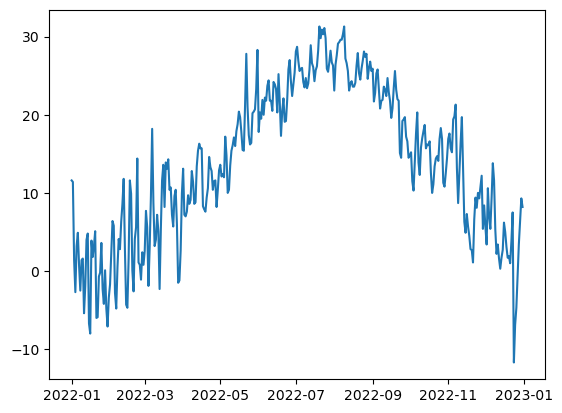

In [150]:
# now plot the temp as a time series!

plt.plot(df_temp['average_temp'])
plt.show()

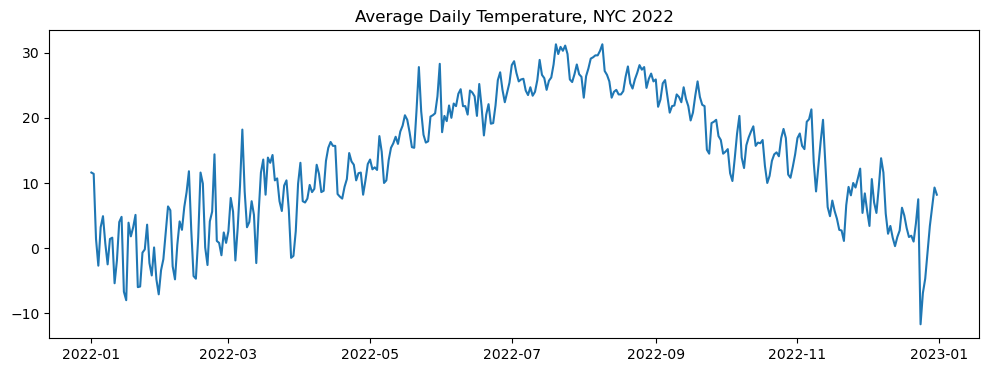

In [152]:
# this is a little cramped, so lets personalize it a bit!

plt.figure(figsize=(12,4))
plt.title('Average Daily Temperature, NYC 2022')
plt.plot(df_temp['average_temp'])
plt.show()

In [154]:
# this is so much better!

In [156]:
# this gives us some good information, but it could be helpful to see how many rides we have per day!
# going to create a new column: 'daily_ride_count'

# first, let's group our data by date! Then take a count of the number of rides (using ride_id) for each group/date
# also going to reset the index, as we don't need our date as the index right now...

df_rides = pd.DataFrame(df2.groupby(['date'])['ride_id'].count()).reset_index()
df_rides

,date,ride_id
0,2022-01-01,5105
1,2022-01-02,10561
2,2022-01-03,8028
3,2022-01-04,9106
4,2022-01-05,8309
...,...,...
360,2022-12-27,8341
361,2022-12-28,11007
362,2022-12-29,13135
363,2022-12-30,15444


In [158]:
# now we have the count of rides for each date, we can merge this with the main dataframe (useful info to have!)
# let's rename the column here as 'daily_ride_count' for clarity!

df_rides.rename(columns = {'ride_id':'daily_ride_count'}, inplace = True)
df_rides

,date,daily_ride_count
0,2022-01-01,5105
1,2022-01-02,10561
2,2022-01-03,8028
3,2022-01-04,9106
4,2022-01-05,8309
...,...,...
360,2022-12-27,8341
361,2022-12-28,11007
362,2022-12-29,13135
363,2022-12-30,15444


In [160]:
# much better!
# now we can merge this!
# going to use an outer merge to ensure that all rows are included (this could result in some nan vals, but can deal with those later
# merging on the date column

df_merge = df2.merge(df_rides, on = 'date', how = 'outer', indicator = True)

# we will use the _merge column generated by indicator = True to verify merge completion

print(df_merge['_merge'].value_counts(dropna = False))

_merge
both          7441508
left_only           0
right_only          0
Name: count, dtype: int64


In [162]:
df_merge.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,_merge
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105,both
1,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105,both
2,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105,both
3,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105,both
4,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105,both


In [164]:
df_merge.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,_merge
7441503,B0C57EA724B535EE,classic_bike,2022-12-31 11:03:00.039,2022-12-31 11:23:47.697,Dock St & Front St,4903.09,Union St & 4 Ave,4175.15,40.702709,-73.992530,40.677274,-73.982820,member,2022-12-31,8.2,20.794300,7858,both
7441504,BB5230400FC38074,electric_bike,2022-12-31 20:09:46.125,2022-12-31 20:27:15.408,W 87 St & West End Ave,7484.05,W 63 St & Broadway,7052.01,40.789515,-73.978084,40.771639,-73.982614,member,2022-12-31,8.2,17.488050,7858,both
7441505,F87F8C5F57F46EEB,electric_bike,2022-12-31 11:25:03.854,2022-12-31 11:46:29.055,E 81 St & 3 Ave,7154.07,Broadway & W 25 St,6173.08,40.775907,-73.956488,40.742869,-73.989186,member,2022-12-31,8.2,21.420017,7858,both
7441506,3D1AA39C8C8A4640,electric_bike,2022-12-31 09:30:41.261,2022-12-31 09:34:42.217,W 70 St & Amsterdam Ave,7207.08,11 Ave & W 59 St,7059.01,40.777480,-73.982886,40.771497,-73.990460,member,2022-12-31,8.2,4.015933,7858,both
7441507,1701C59034632238,classic_bike,2022-12-31 15:28:48.133,2022-12-31 15:30:33.779,Montague St & Clinton St,4677.06,Henry St & Remsen St,4645.04,40.694271,-73.992327,40.694010,-73.994651,member,2022-12-31,8.2,1.760767,7858,both


In [166]:
# performing another check that this worked!
# we should get the value of 5105 when printing the subset of the data that is just for jan 1 and 7858 for Dec 31

print(df_merge[df_merge['date'] == '2022-01-01'].shape)
print(df_merge[df_merge['date'] == '2022-12-31'].shape)

(5105, 18)
(7858, 18)


In [168]:
# now that we know this works, we can take our df_merge and make the date the index again so we can plot

df_temp1 = df_merge.set_index('date')
df_temp1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp,trip_length_minutes,daily_ride_count,_merge
date,,,,,,,,,,,,,,,,,
2022-01-01,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,11.6,10.368000,5105,both
2022-01-01,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,11.6,8.487583,5105,both
2022-01-01,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,11.6,22.788850,5105,both
2022-01-01,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,11.6,10.781733,5105,both
2022-01-01,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,11.6,9.753150,5105,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,B0C57EA724B535EE,classic_bike,2022-12-31 11:03:00.039,2022-12-31 11:23:47.697,Dock St & Front St,4903.09,Union St & 4 Ave,4175.15,40.702709,-73.992530,40.677274,-73.982820,member,8.2,20.794300,7858,both
2022-12-31,BB5230400FC38074,electric_bike,2022-12-31 20:09:46.125,2022-12-31 20:27:15.408,W 87 St & West End Ave,7484.05,W 63 St & Broadway,7052.01,40.789515,-73.978084,40.771639,-73.982614,member,8.2,17.488050,7858,both
2022-12-31,F87F8C5F57F46EEB,electric_bike,2022-12-31 11:25:03.854,2022-12-31 11:46:29.055,E 81 St & 3 Ave,7154.07,Broadway & W 25 St,6173.08,40.775907,-73.956488,40.742869,-73.989186,member,8.2,21.420017,7858,both


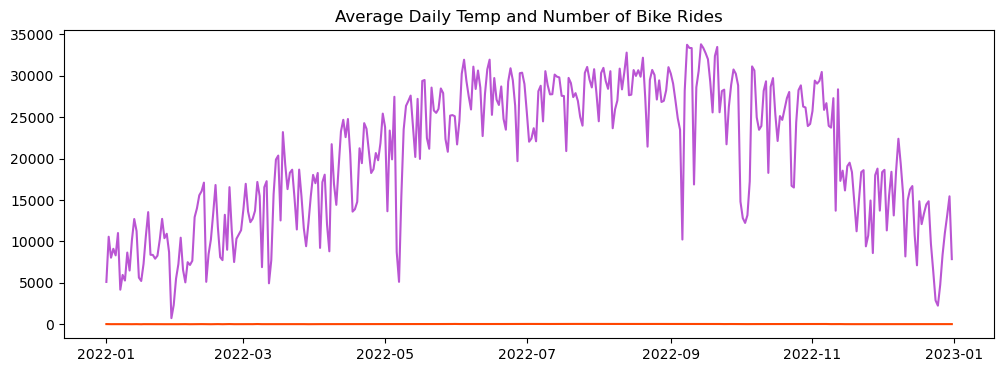

In [170]:
# now we can create a line chart of bike trip counts and temps on a dual axis!

# first start with our figure size (12,4) worked well above

plt.figure(figsize=(12,4))
plt.title('Average Daily Temp and Number of Bike Rides')
plt.plot(df_temp1['average_temp'], color = 'orangered')
plt.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
plt.show()

While this does give us *some* information, it isn't very informative as the scale the two units are too different for us to gather any meaningful relationship into how temperature has an impact on rider activity!

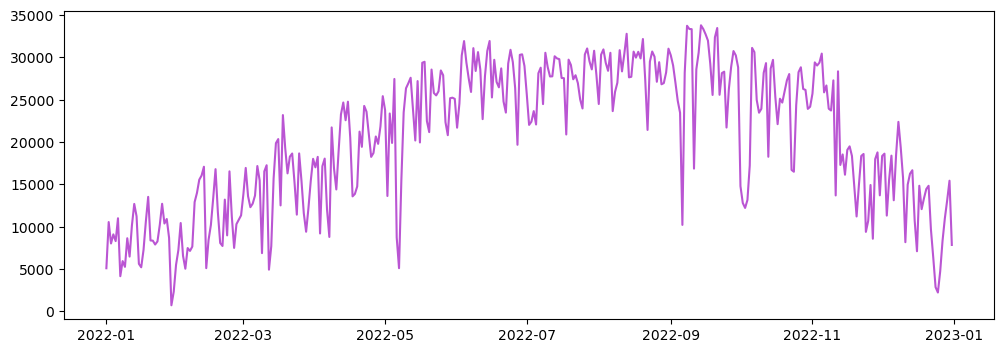

In [173]:
# lets plot this using another method, to see if we can create something more insightful!
# using an Object-Oriented approach might allow us to add more detail/insight

fig,ax = plt.subplots(figsize=(12,4))

# now that we have defined our figure and axes, we can start to build out our plot!

ax.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
plt.show()

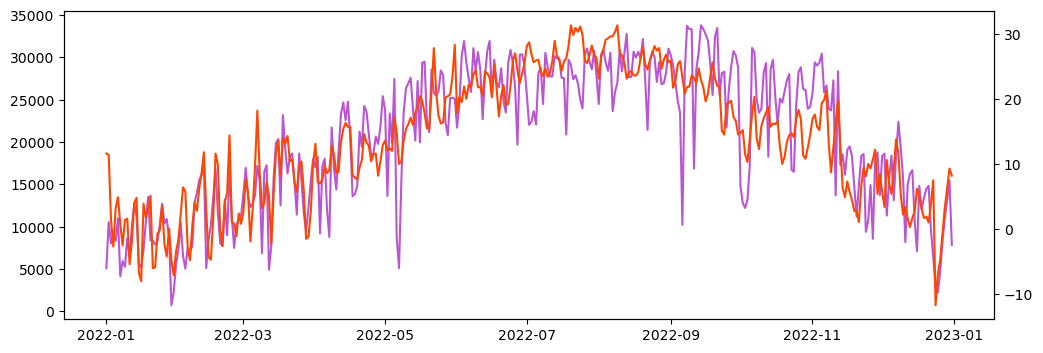

In [175]:
# we've plotted the bike rides, now lets work on adding our daily temp to this plot to see if there's any relationship!
# we are going to have to use a dual axis in order for both columns to be plotted on our line graph.

# first, our code from above:

fig,ax = plt.subplots(figsize=(12,4))
ax.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')

# now using twinx() to create another line for temp.

ax2 = ax.twinx()
ax2.plot(df_temp1['average_temp'], color = 'orangered')
plt.show()

In [177]:
# looking at this, we can see that the units for ride count are along the left hand side, and the units for temp are along the right
# this plot would look a LOT better and be a LOT more legible with a Title and Axis Titles!

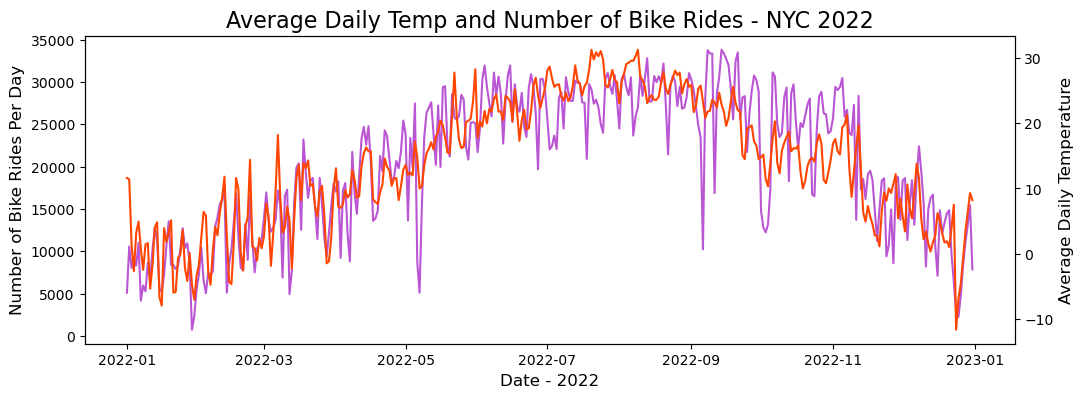

In [179]:
# first, define the figure size / axes

fig,ax = plt.subplots(figsize=(12,4))

# now plot our bike rides BUT add in title / labels

ax.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
ax.set_xlabel("Date - 2022", fontsize = 12) # x-axis
ax.set_ylabel("Number of Bike Rides Per Day", fontsize = 12) # y-axis

# now plot our daily avg temp! first, use twinx

ax2 = ax.twinx()
ax2.plot(df_temp1['average_temp'], color = 'orangered')
ax2.set_ylabel('Average Daily Temperature', fontsize = 12) # x-axis was set above! so only y-axis here

# finally, add title then show!

plt.title('Average Daily Temp and Number of Bike Rides - NYC 2022', fontsize = 16)
plt.show()

In [181]:
# this gives us a lot of good information, and we can see that warmer weather does appear to impact rider activity
# This is a little busy, however, so let's create another where each line graph is stacked, instead of overlapping!

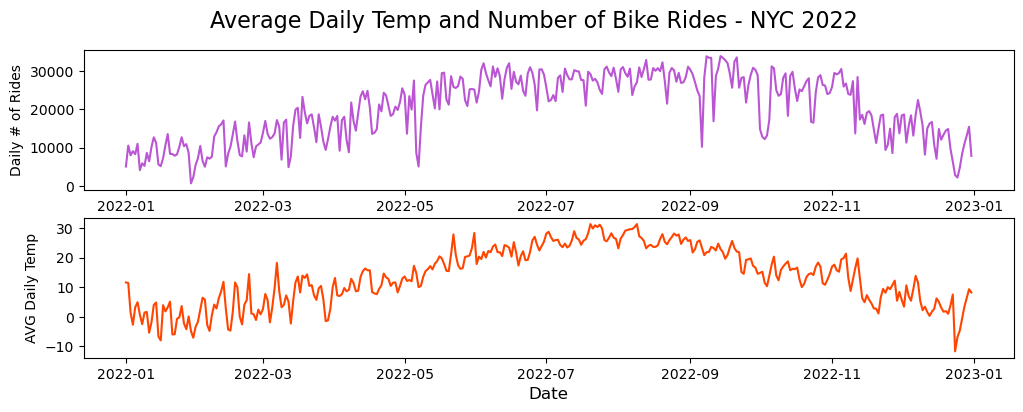

In [183]:
# going to use subplots to create a plot with 2 separate axes:

fig,ax = plt.subplots(2, figsize = (12,4))

# using ax[0] as our first axis to plot our bike ride info:

ax[0].plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
ax[0].set_ylabel("Daily # of Rides", fontsize = 10)

# using ax[1] as our second axis to plot our temp info:

ax[1].plot(df_temp1['average_temp'], color = 'orangered')
ax[1].set_xlabel('Date', fontsize = 12)
ax[1].set_ylabel('AVG Daily Temp', fontsize = 10)

# adding a title and showing!

plt.suptitle('Average Daily Temp and Number of Bike Rides - NYC 2022', fontsize = 16)
plt.show()

I used matplotlib and the object oriented approach to create a more detailed and informative line plot that shows both the average daily temp and the daily count of bike rides. By using the subplot method, I was able to create two different (but equally informative) line graphs. One where the data is plotted on the same chart, overlapping, an another where the charts are stacked. While the relationship betwen temperature and ride count is clearly visible, the overlapping (shared axis) chart shows this more easily. It is a little busy, so if legibility is a concern, then utilizing the stacked chart is another equally informative option!

In [189]:
# dropping the _merge column:

df_merge = df_merge.drop(columns = ['_merge'])
df_merge.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105
1,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105
2,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105
3,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105
4,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105


In [191]:
# quick export of df_merge, where we have ride counts per date, in case we need it later!

df_merge.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv')